The Lorenz System of Ordinary Differential Equations (ODE) describes the dynamics of a simplified atmospheric convection model. It consists of three coupled nonlinear differential equations:

\begin{align*}
\dot{x} &= \sigma \cdot (y - x) \\
\dot{y} &= x \cdot (r - z) - y \\
\dot{z} &= x \cdot y - b \cdot z \\
\end{align*}

$\sigma, r, b >0$ are the parameters of the system.

# Fixed points
* If $r<1$ then there exits trivial Equlibiria
$$E_0 = (0,0,0)$$
* If $r>1$ then
$
x= \pm \sqrt{b(r-1)}.
$
There are two non-trivial fixed points:

\begin{array}{l}  
C_+ = (\sqrt{b(r-1)},\sqrt{b(r-1)},r-1) \\
C_- = (-\sqrt{b(r-1)},-\sqrt{b(r-1)},r-1)
\end{array}

#Stability

* If $r<1$ then $(0,0,0)$ is globally asymptotically stable.
* if $$
\boxed{1<r<r_H=\dfrac{\sigma (\sigma+b+3)}{\sigma-b-1}}
$$
with $\sigma-b-1>0$ then $C_+$ and $C_-$ are locally asymptotically stable.
* At $r=r_H$ the two internal equilibria $C_+$ and $C_-$ lose stability and a subcritical Hopf bifurcation occurs.
* The two limit cycles, which exist for $r<r_H$ and are ``saddle cycles'' (unstable), disappear for $r \geq r_H$.  
Some mathematician called it **Strange attractor** but these days we call them **fractal**.


#Solution of Lorenz system and parameter manipulations

In [41]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, Output, VBox
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D from mpl_toolkits.mplot3d


sigma = 10
b = 8 / 3
r = 28  # Initial value of r
rH = sigma * (sigma + b + 3) / (sigma - b - 1)
print('rH = ', rH)
out = Output()

def update_value(val, elev, azim):
    global r
    r = val

    def lorenz_system(x, t):
        return [-sigma * x[0] + sigma * x[1], r * x[0] - x[1] - x[0] * x[2], -b * x[2] + x[0] * x[1]]

    t = np.linspace(0, 100, 10000)
    initial_conditions = [-10, 10, 10]
    solution = odeint(lorenz_system, initial_conditions, t)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the updated solution trajectory
    ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], label='Lorenz System')

    # Mark fixed points based on r value
    if r < 1:
        ax.scatter([0], [0], [0], color='black', s=100, label=f'Fixed Points (0, 0, 0) (Current r value: {r:.2f})')
    elif 1 < r < 28:
        ax.scatter(np.sqrt(b * (r - 1)), np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')
        ax.scatter(-np.sqrt(b * (r - 1)), -np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')

    # Set labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Set the view angles based on the input values
    ax.view_init(elev=elev, azim=azim)

    plt.show()

# Define the interactive plot with sliders for r, elevation (elev), and azimuth (azim)
slider_r = widgets.FloatSlider(value=r, min=0.1, max=28.0, step=0.1, description='r')
slider_elev = widgets.IntSlider(value=30, min=0, max=90, step=5, description='Elevation')
slider_azim = widgets.IntSlider(value=30, min=0, max=360, step=5, description='Azimuth')

interactive_plot = interact(update_value, val=slider_r, elev=slider_elev, azim=slider_azim)

# Display the interactive plot and output area in a VBox
# VBox([interactive_plot.widget, out])



rH =  24.736842105263154


interactive(children=(FloatSlider(value=28.0, description='r', max=28.0, min=0.1), IntSlider(value=30, descrip…

# We start with three different initial conditions.

interactive(children=(FloatSlider(value=28.0, description='r', max=28.0, min=0.1), IntSlider(value=30, descrip…

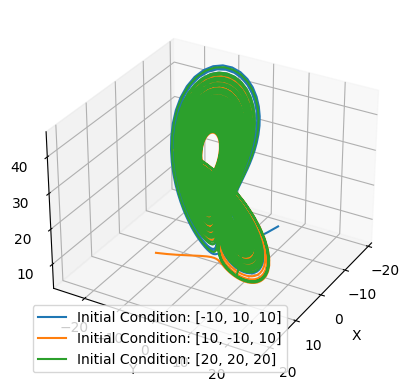

In [43]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

sigma = 10
b = 8 / 3
r = 28

def lorenz_system(x, t):
    return [-sigma * x[0] + sigma * x[1], r * x[0] - x[1] - x[0] * x[2], -b * x[2] + x[0] * x[1]]

def plot_lorenz_trajectories(initial_conditions, r_val, elev_val, azim_val):
    global r
    r = r_val

    t = np.linspace(0, 100, 10000)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for initial_condition in initial_conditions:
        solution = odeint(lorenz_system, initial_condition, t)
        ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], label=f'Initial Condition: {initial_condition}')

    # Mark fixed points based on r value
    if r < 1:
        ax.scatter([0], [0], [0], color='black', s=100, label=f'Fixed Points (0, 0, 0) (Current r value: {r:.2f})')
    elif 1 < r < 28:
        ax.scatter(np.sqrt(b * (r - 1)), np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')
        ax.scatter(-np.sqrt(b * (r - 1)), -np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    ax.view_init(elev=elev_val, azim=azim_val)

    plt.show()

def update_value(val, elev, azim):
    plot_lorenz_trajectories(initial_conditions_list, val, elev, azim)

# Define three different initial conditions
initial_conditions_list = [
    [-10, 10, 10],
    [10, -10, 10],
    [20, 20, 20]
]

# Define the interactive plot with sliders for r, elevation (elev), and azimuth (azim)
slider_r = widgets.FloatSlider(value=r, min=0.1, max=28.0, step=0.1, description='r')
slider_elev = widgets.IntSlider(value=30, min=0, max=90, step=5, description='Elevation')
slider_azim = widgets.IntSlider(value=30, min=0, max=360, step=5, description='Azimuth')

interactive_plot = interact(update_value, val=slider_r, elev=slider_elev, azim=slider_azim)

plot_lorenz_trajectories(initial_conditions_list, r, 30, 30)  # Initial plot


#Suppose we modify the initial conditions just a bit and compare the solution.

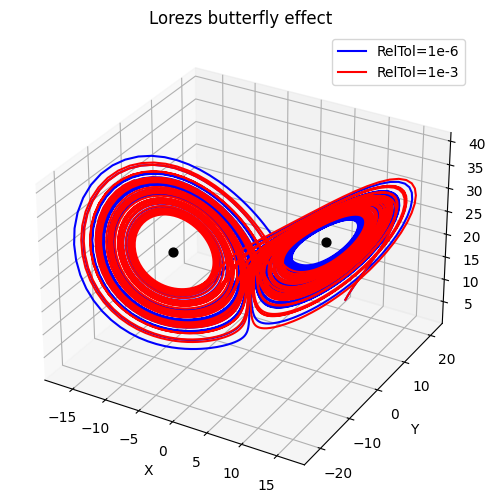

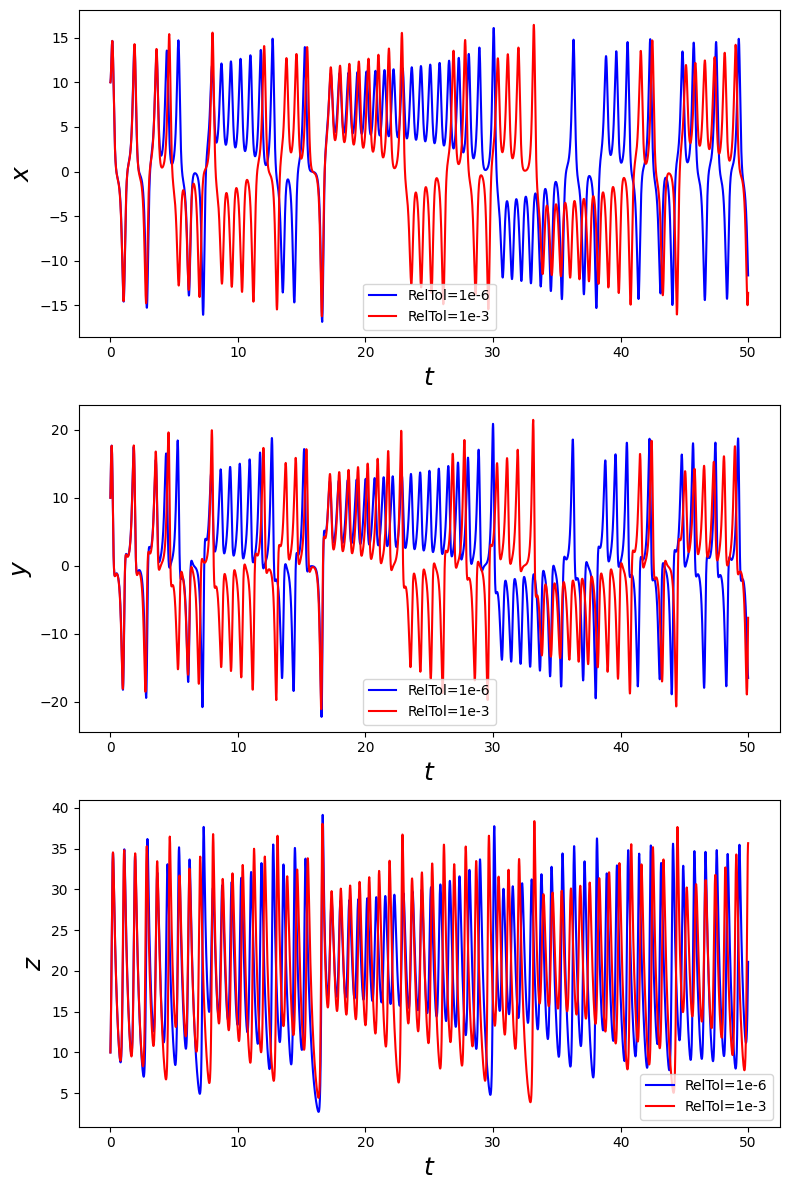

In [ ]:
# Define the Lorenz system as a function
def lorenz(y, t, sigma, r, b):
    dydt = [sigma * (y[1] - y[0]),
            r * y[0] - y[1] - y[0] * y[2],
            y[0] * y[1] - b * y[2]]
    return dydt

# Define parameters
sigma = 10.0
r = 24.0
b = 8.0 / 3.0

# Initial conditions
y0 = [10, 10, 10]

# Time points for simulation
t = np.linspace(0, 50, 5000)

# Solve the ODE system with different relative tolerances
options1 = {'rtol': 1e-6}
options2 = {'rtol': 1e-3}
solution1 = odeint(lorenz, y0, t, args=(sigma, r, b), **options1)
solution2 = odeint(lorenz, y0, t, args=(sigma, r, b), **options2)

# LORENZ'S BUTTERFLY EFFECT
# Plot the 3D trajectory
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution1[:, 0], solution1[:, 1], solution1[:, 2], 'b', label='RelTol=1e-6')
ax.plot(solution2[:, 0], solution2[:, 1], solution2[:, 2], 'r', label='RelTol=1e-3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorezs butterfly effect')
ax.legend()

# Plot the fixed points based on r value
if r < 1:
    ax.scatter(np.sqrt(b * (r - 1)), np.sqrt(b * (r - 1)), (r - 1), color='black', s=100, label='Fixed Points')
else:
    ax.scatter(np.sqrt(b * (r - 1)), np.sqrt(b * (r - 1)), (r - 1), color='black', s=40, label='Fixed Points')
    ax.scatter(-np.sqrt(b * (r - 1)), -np.sqrt(b * (r - 1)), (r - 1), color='black', s=40, label='Fixed Points')

# Create comparison plots for each variable with different relative tolerances
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, var in enumerate(['$x$', '$y$', '$z$']):
    axs[i].plot(t, solution1[:, i], 'b', label='RelTol=1e-6')
    axs[i].plot(t, solution2[:, i], 'r', label='RelTol=1e-3')
    axs[i].set_xlabel('$t$', fontsize=18)
    axs[i].set_ylabel(var, fontsize=18)
    axs[i].legend()

plt.tight_layout()
plt.show()


In [33]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sigma = 10
b = 8 / 3
r = 28  # Initial value of r
rH = sigma * (sigma + b + 3) / (sigma - b - 1)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

def update_value(val):
    global r, rH
    r = val
    rH = sigma * (sigma + b + 3) / (sigma - b - 1)

    # Call your simulation code here with the updated value of r
    def lorenz_system(x, t):
        return [-sigma * x[0] + sigma * x[1], r * x[0] - x[1] - x[0] * x[2], -b * x[2] + x[0] * x[1]]

    t = np.linspace(0, 100, 1000)
    initial_conditions = [10, 10, 10]
    solution = odeint(lorenz_system, initial_conditions, t)

    # Plot the solution trajectory
    ax.clear()
    ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], label='Lorenz System')

    # Mark fixed points based on r value
    if r < 1:
        ax.scatter([0], [0], [0], color='black', s=100, label='Fixed Point (0, 0, 0)')
    elif 1 < r < 28:
        ax.scatter(np.sqrt(b * (r - 1)), np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')
        ax.scatter(-np.sqrt(b * (r - 1)),- np.sqrt(b * (r - 1)), (r - 1), color='red', s=100, label=f'Fixed Points (Current r value: {r:.2f})')

    # Set labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(f'Lorenz System for r = {r:.2f}')  # Set dynamic title


def animate(frame):
    update_value(0.2 * frame)
    return fig,

anim = FuncAnimation(fig, animate, frames=range(int(30 / 0.1)), interval=200)
plt.close()  # Prevents double-display of the animation

HTML(anim.to_html5_video())


Output hidden; open in https://colab.research.google.com to view.

interactive(children=(FloatSlider(value=28.0, description='r', max=28.0, min=0.1), IntSlider(value=30, descrip…

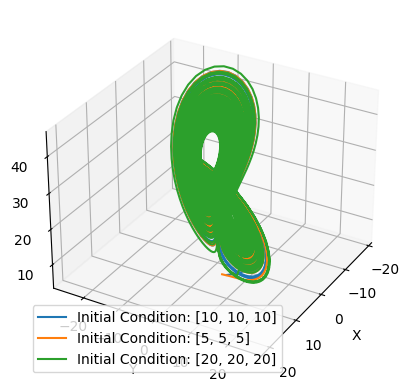